In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

# Load your dataset
df_alz = pd.read_csv("alzheimers_disease_data.csv")

# Drop the 'DoctorIncharge' column
df_alz = df_alz.drop(["DoctorInCharge", "PatientID"], axis=1)  # Pass column names as a list

# Verify the column has been removed
df_alz.info()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\ProgramData\anaco

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\ProgramData\anaco

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

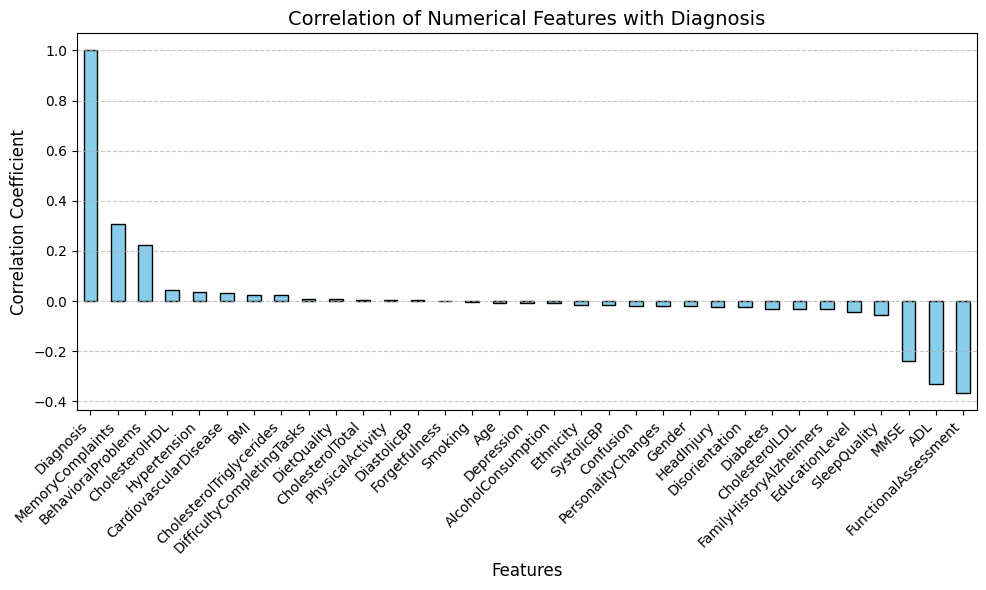

In [ ]:
#Correlation (For Numerical Features)
#For numerical features and a categorical label (like diagnosis),
#calculate the correlation or use statistical tests like ANOVA.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_alz is your DataFrame and 'diagnosis' is your label
numerical_features = df_alz.select_dtypes(include=["float64", "int64"]).columns
correlation = df_alz[numerical_features].corrwith(df_alz["Diagnosis"])

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Diagnosis', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

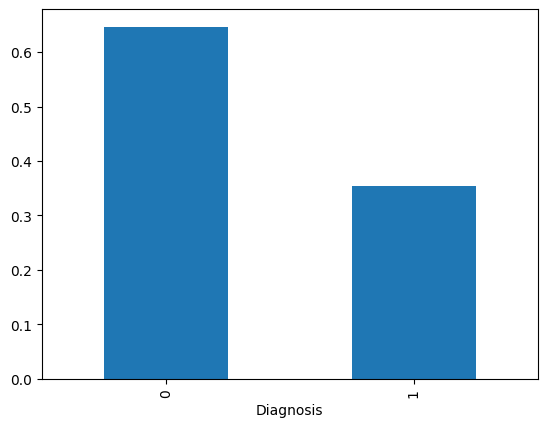

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64


In [ ]:
df_alz['Diagnosis'].value_counts(normalize=True)
# 0=No, 1=Yes

# Check imbalance
df_alz['Diagnosis'].value_counts(normalize=True).plot(kind='bar')
plt.show()

print(df_alz['Diagnosis'].value_counts(normalize=True))

#Focus on diagnosis of having alzheimer, so using undersampling to remove extra no alzheimer row data

In [ ]:
#Extract the selected features from dataset
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',
    'MemoryComplaints', 'BehavioralProblems'
]

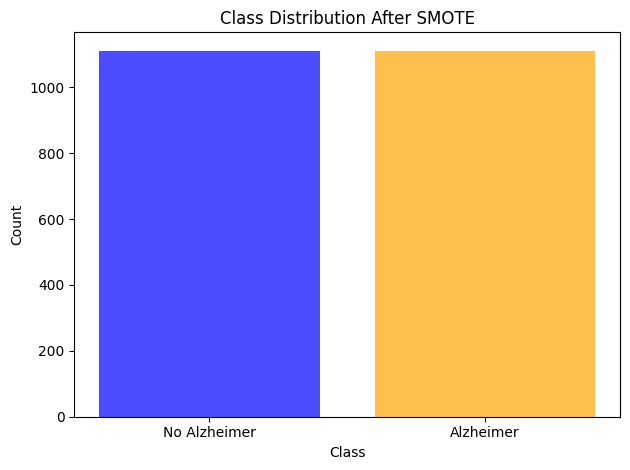

In [ ]:
#result on accuracy, precision, f1score decreased means correct classification on alzheimer case REDUCE.
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE  # Import SMOTE here


# Define features and target
X = df_alz[selected_features]
y = df_alz['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Plot the class distribution after SMOTE
unique, counts = np.unique(y_train_smote, return_counts=True)
plt.bar(unique, counts, color=['blue', 'orange'], alpha=0.7)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Alzheimer', 'Alzheimer'])
plt.tight_layout()
plt.show()

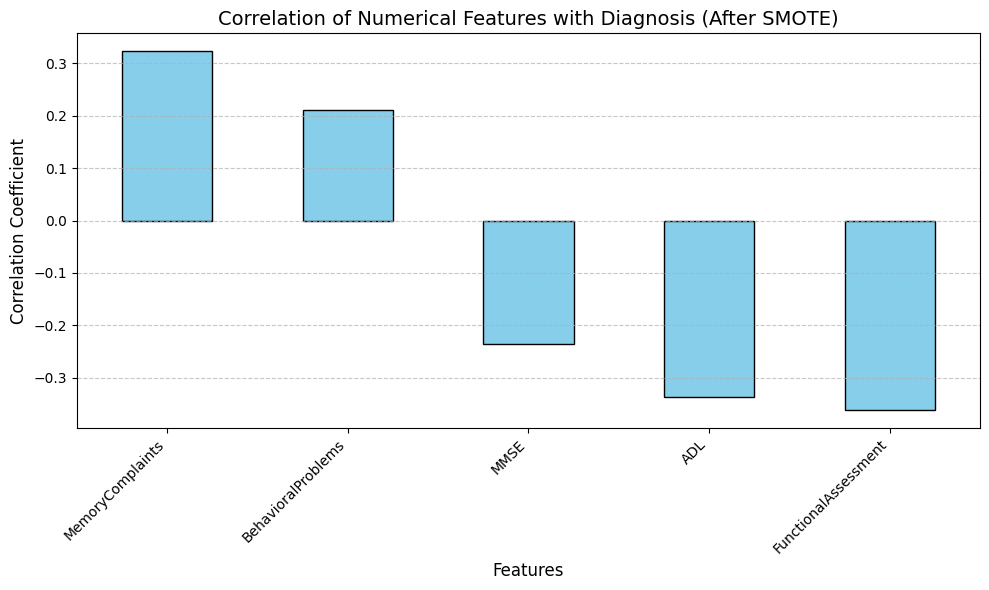

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming you already have X_train_smote and y_train_smote after applying SMOTE

# Combine the resampled features and target into a DataFrame
X_train_df = pd.DataFrame(X_train, columns=selected_features)
y_train_df = pd.Series(y_train, name="Diagnosis")

# Create a combined DataFrame for correlation analysis
df_smote = pd.concat([X_train_df, y_train_df], axis=1)

# Compute the correlation of numerical features with the diagnosis label
numerical_features = X_train_df.columns
correlation = df_smote[numerical_features].corrwith(df_smote["Diagnosis"])

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Diagnosis (After SMOTE)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assuming 'y' is the target variable
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) #Use 0.2 as test because accuracy is higher
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
#model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

#Accuracy: Proportion of correctly classified instances.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#From 0.94 decreased to 0.92 (SMOTE)

Accuracy: 0.9441860465116279


In [ ]:
#Precision: Proportion of positive predictions that are actually correct.
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
#From 0.9266 decreased to 0.869

Precision: 0.9266666666666666


In [ ]:
#Recall (Sensitivity): Proportion of actual positives that are correctly identified.
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
#From 0.91 increased to 0.92

Recall: 0.9144736842105263


In [ ]:
#F1-Score: Harmonic mean of Precision and Recall. It's useful when you need a balance between Precision and Recall.
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")
#From 0.92 decreased to 0.894

F1-Score: 0.9205298013245033


ROC AUC: 0.9481493752366527


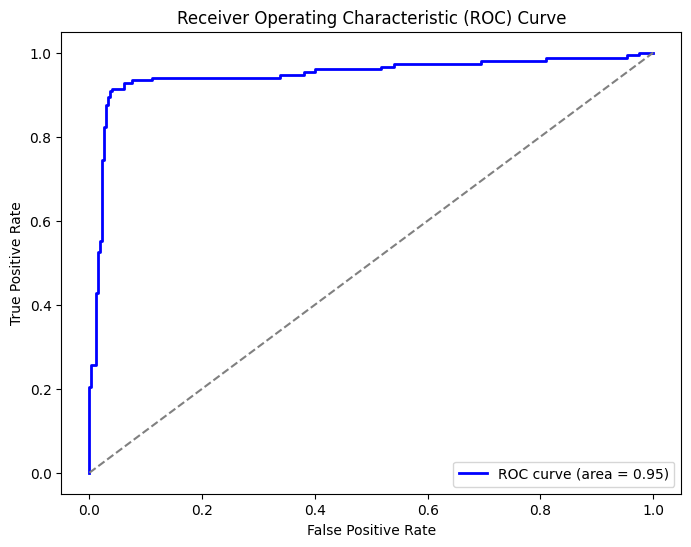

In [ ]:
#ROC Curve and AUC (Area Under the Curve): Measures the performance of a binary classification model at all classification thresholds.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#Area 0.95 decreased to 0.937

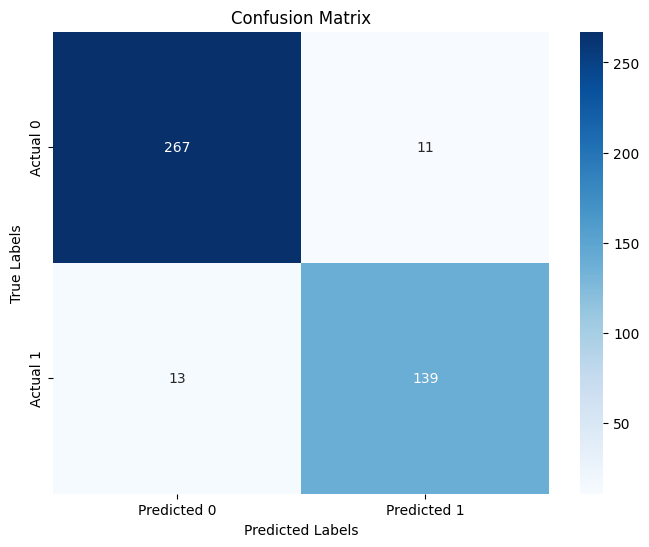

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

In [ ]:
#2. Extract the leaf node indices for each sample in the dataset XGBoost method

# Step 1: Extract the leaf node indices for all samples in the training set
leaf_indices = model.apply(X_train)

# Step 2: Filter the dataset for samples with Alzheimer's (label '1')
alzheimers_indices = np.where(y_train == 1)[0]  # Get indices of samples with Alzheimer's (label 1)

# Step 3: Extract the leaf node indices for only Alzheimer's samples
leaf_indices_alzheimers = leaf_indices[alzheimers_indices]

# Step 4: Print the leaf node indices for the first 5 Alzheimer's samples
print("Leaf node indices for the first 5 Alzheimer's samples:")
print(leaf_indices_alzheimers[:5])

Leaf node indices for the first 5 Alzheimer's samples:
[[ 7.  7. 16. 56. 54. 54. 61. 56. 52. 46. 38. 59. 43. 26. 39. 39. 37. 26.
  33. 34. 40. 30. 27. 38. 36. 37. 31. 36. 32. 32. 24. 27. 22. 43. 25. 40.
  21. 30. 31. 38. 27. 22. 40. 37. 46. 39. 27. 40. 13. 32. 32. 32. 32. 20.
  44. 31. 42. 27. 28. 17. 35. 32. 27. 34. 30. 42. 14. 27.  4. 27. 33. 36.
  23. 28. 28. 27. 24. 32. 25. 20. 24. 36. 17. 22. 28. 34. 35. 35. 35. 28.
  25. 24. 30. 30. 25. 33. 34. 21. 26. 21.]
 [19. 16. 33. 61. 60. 60. 67. 61. 35. 22. 35. 42. 44. 16. 40. 22. 33. 15.
  34. 27. 40. 51. 16.  8. 38. 37.  3. 41. 31. 37. 16. 27. 22. 11. 25. 40.
  25. 30. 38. 38. 34. 22. 11. 35. 18. 14. 30. 13. 13. 31. 19. 21. 32. 15.
  47. 33. 42. 28. 30. 27. 33. 32. 34. 32. 27. 43. 44. 21.  4. 28. 33. 23.
  24. 23. 27. 29. 25. 32.  5. 20. 23. 33. 15. 22. 11. 17. 35. 33. 41. 19.
  25. 24. 21. 25. 25. 27. 21.  9. 26. 16.]
 [ 7.  7. 16. 15. 15. 15. 60. 54. 52. 46. 38. 52. 40. 26. 39. 39. 37. 26.
  44. 34. 40. 50. 27. 37. 36. 37. 30. 36. 31.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Step 4: Flatten the leaf indices for Alzheimer's samples (shape: (n_samples * n_trees, 1))
leaf_indices_flattened = leaf_indices_alzheimers.reshape(-1, 1)

# Step 5: One-hot encode the leaf indices
encoder = OneHotEncoder(sparse_output=False)
leaf_indices_encoded = encoder.fit_transform(leaf_indices_flattened)

# Step 6: Reshape the one-hot encoded array to match the number of Alzheimer's samples
n_samples_alzheimers = leaf_indices_alzheimers.shape[0]
n_trees = leaf_indices_alzheimers.shape[1]

# Reshape the one-hot encoded array to match (n_samples_alzheimers, n_trees * n_leaf_categories)
leaf_indices_encoded_reshaped = leaf_indices_encoded.reshape(n_samples_alzheimers, -1)

# Step 7: Ensure you're indexing X_train properly. If X_train is a NumPy array:
X_train_alzheimers = X_train.iloc[alzheimers_indices]  # For Pandas DataFrame, use .iloc to index by row

# Step 8: Concatenate the original features of Alzheimer's samples with the one-hot encoded leaf indices
X_encoded = np.hstack([X_train_alzheimers, leaf_indices_encoded_reshaped])

# Step 9: Print the shape of the encoded dataset
print("Shape of the encoded dataset:", X_encoded.shape)

Shape of the encoded dataset: (608, 8305)


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # You can adjust n_components depending on how much variance you want to preserve

# Perform PCA only on the leaf indices (not the entire feature set)
leaf_indices_pca = pca.fit_transform(leaf_indices_encoded_reshaped)

# Print the shape of the PCA-reduced leaf indices
print("Shape of the PCA-reduced leaf indices:", leaf_indices_pca.shape)

# Step 2: Concatenate the original features (only Alzheimer's samples) with the PCA-reduced leaf indices
# Make sure you're using the Alzheimer's samples from X_train, not the full X_train dataset
# Ensure that you are using iloc for row indexing in a DataFrame
X_train_alzheimers = X_train.iloc[alzheimers_indices]  # Use .iloc[] to index by row for a DataFrame

# Concatenate the features and PCA-reduced leaf indices
X_encoded_reduced = np.hstack([X_train_alzheimers, leaf_indices_pca])

# Print the shape of the encoded and reduced dataset
print("Shape of the encoded and reduced dataset:", X_encoded_reduced.shape)


Shape of the PCA-reduced leaf indices: (608, 2)
Shape of the encoded and reduced dataset: (608, 7)


In [ ]:
pip install kmodes

Number of outliers removed: 0
Silhouette Score (gamma=0.5): 0.2510276211103135
Silhouette Score (gamma=1): 0.2510276211103135
Silhouette Score (gamma=2): 0.2510276211103135


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


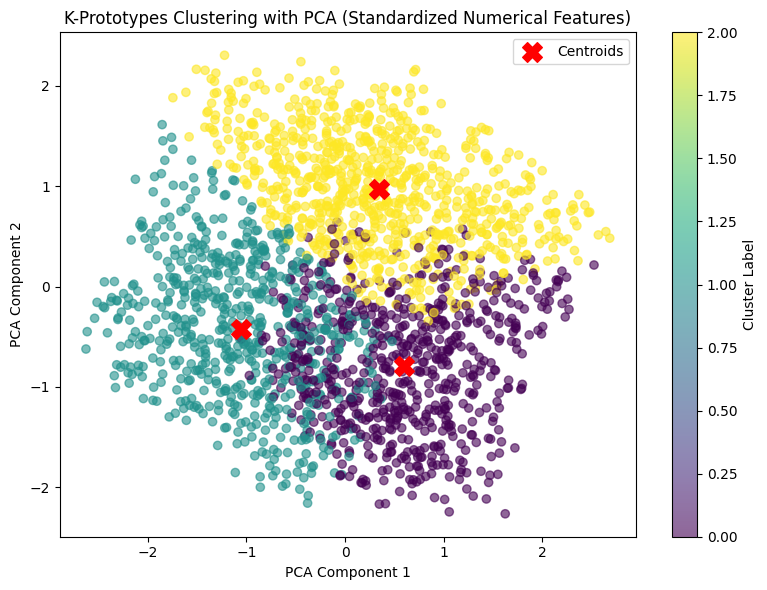

Cluster Centers (Prototypes):
        MMSE  FunctionalAssessment       ADL  MemoryComplaints  \
0   9.005364              7.492195  6.059415               0.0   
1   9.291347              2.334552  4.136647               0.0   
2  23.756625              5.285036  4.774978               0.0   

   BehavioralProblems  Cluster  
0                 0.0        0  
1                 0.0        1  
2                 0.0        2  


In [ ]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Step 1: Load your dataset (replace with your actual dataset)
# Example:
df_alz = pd.read_csv("alzheimers_disease_data.csv")

# Drop the 'DoctorIncharge' and 'PatientID' columns
df_alz = df_alz.drop(["DoctorInCharge", "PatientID"], axis=1)

# Step 2: Define selected features
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',  # Numerical
    'MemoryComplaints', 'BehavioralProblems'  # Categorical
]

# Extract the selected features
X_train = df_alz[selected_features]

# Step 3: Identify categorical columns
categorical_cols = [3, 4]  # Indices of 'MemoryComplaints' and 'BehavioralProblems' in selected_features

# Step 4: Remove outliers using Z-score (for numerical features only)
# Calculate Z-scores for numerical features
z_scores = np.abs(zscore(X_train.iloc[:, numerical_cols]))

# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from the dataset
X_train_cleaned = X_train.drop(X_train.index[outlier_indices]).reset_index(drop=True)

# Print the number of outliers removed
print(f"Number of outliers removed: {len(outlier_indices)}")

# Step 5: Standardize numerical features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = X_train_cleaned.copy()
numerical_cols = [0, 1, 2]  # Indices of 'MMSE', 'FunctionalAssessment', 'ADL' in selected_features
X_train_scaled.iloc[:, numerical_cols] = scaler.fit_transform(X_train_cleaned.iloc[:, numerical_cols])

# Step 6: Convert the dataset to a NumPy array for K-Prototypes
X_train_array = X_train_scaled.to_numpy()

# Step 7: Apply K-Prototypes
for gamma in [0.5, 1, 2]:
    kproto = KPrototypes(n_clusters=3, init='Cao', verbose=0, gamma=gamma,  n_init=10)
    clusters = kproto.fit_predict(X_train_array, categorical=categorical_cols)
    score = silhouette_score(X_train_scaled.iloc[:, numerical_cols], clusters)
    print(f"Silhouette Score (gamma={gamma}): {score}")

# Step 8: Visualize the clusters using PCA (for numerical features only)
# Apply PCA to reduce numerical features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled.iloc[:, numerical_cols])

# Create a DataFrame for visualization
clustered_data = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
clustered_data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(clustered_data['PCA1'], clustered_data['PCA2'], c=clustered_data['Cluster'], cmap='viridis', alpha=0.6, marker='o')

# Add cluster centroids to the plot (transform centroids to 2D using PCA)
centroids_pca = pca.transform(kproto.cluster_centroids_[:, numerical_cols])
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label="Centroids")

# Add labels, title, and color bar
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Prototypes Clustering with PCA (Standardized Numerical Features)')
plt.legend()
plt.tight_layout()
plt.show()

# Step 9: Interpret the cluster centers (prototypes)
# Convert cluster centers back to the original scale for numerical features
cluster_centers_original_scale = kproto.cluster_centroids_.copy()
cluster_centers_original_scale[:, numerical_cols] = scaler.inverse_transform(cluster_centers_original_scale[:, numerical_cols])

# Create a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers_original_scale, columns=selected_features)
cluster_centers_df['Cluster'] = range(kproto.n_clusters)

print("Cluster Centers (Prototypes):")
print(cluster_centers_df)

Silhouette Score for K-Mean: 0.3651492175548724


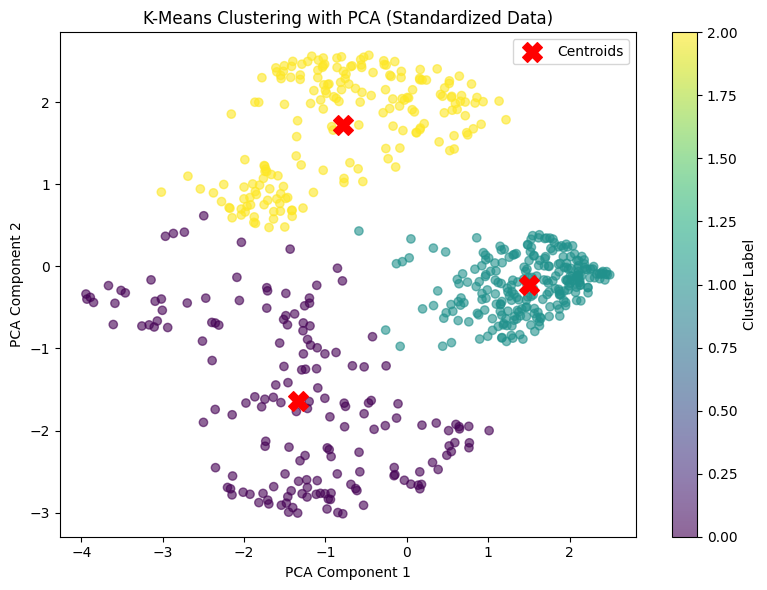

In [ ]:
#Apply k-Means with Scaler Method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Assuming X_encoded_reduced is your feature matrix

# Step 1: Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_reduced)

# Step 2: Apply PCA to reduce the dimensions to 2D
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose your desired number of clusters (k)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for K-Mean: {silhouette_avg}")
#The value of 0.039 means Clusters are not too overlap, if compare with kmedoids, or points are ambiguous in their cluster assignment.


# Step 4: Create a DataFrame for better organization
clustered_data_Kmeans_Scaler = pd.DataFrame(X_scaled, columns=[f"Feature_{i}" for i in range(X_scaled.shape[1])])
clustered_data_Kmeans_Scaler['PCA1'] = X_pca[:, 0]  # First principal component
clustered_data_Kmeans_Scaler['PCA2'] = X_pca[:, 1]  # Second principal component
clustered_data_Kmeans_Scaler['Cluster'] = kmeans_labels  # Cluster labels

# Step 5: Visualize the clusters in 2D using PCA components
plt.figure(figsize=(8, 6))

# Scatter plot with cluster colors
scatter = plt.scatter(clustered_data_Kmeans_Scaler['PCA1'], clustered_data_Kmeans_Scaler['PCA2'],
                       c=clustered_data_Kmeans_Scaler['Cluster'], cmap='viridis', alpha=0.6, marker='o')

# Add cluster centroids to the plot
centroids = pca_2d.transform(kmeans.cluster_centers_)  # Transform centroids to 2D using PCA
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label="Centroids")

# Add labels, title, and color bar
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA (Standardized Data)')
plt.legend()
plt.tight_layout()
plt.show()

Silhouette Score for K-Mean: 0.3651492175548724


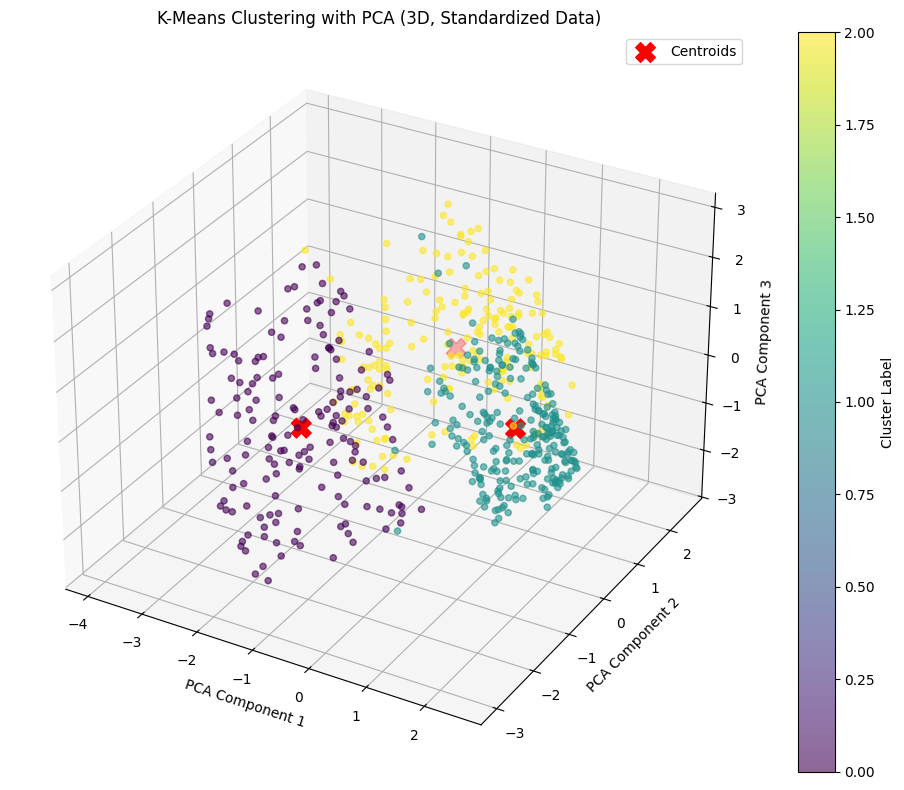

In [ ]:
#3D visualization
#Apply k-Means with Scaler Method

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_encoded_reduced is your feature matrix

# Step 1: Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_reduced)

# Step 2: Apply PCA to reduce the dimensions to 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose your desired number of clusters (k)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for K-Mean: {silhouette_avg}")
# The value of silhouette score will give an idea of cluster quality

# Step 4: Create a DataFrame for better organization
clustered_data_Kmeans_Scaler = pd.DataFrame(X_scaled, columns=[f"Feature_{i}" for i in range(X_scaled.shape[1])])
clustered_data_Kmeans_Scaler['PCA1'] = X_pca_3d[:, 0]  # First principal component
clustered_data_Kmeans_Scaler['PCA2'] = X_pca_3d[:, 1]  # Second principal component
clustered_data_Kmeans_Scaler['PCA3'] = X_pca_3d[:, 2]  # Third principal component
clustered_data_Kmeans_Scaler['Cluster'] = kmeans_labels  # Cluster labels

# Step 5: Visualize the clusters in 3D using PCA components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
scatter = ax.scatter(clustered_data_Kmeans_Scaler['PCA1'], clustered_data_Kmeans_Scaler['PCA2'],
                     clustered_data_Kmeans_Scaler['PCA3'], c=clustered_data_Kmeans_Scaler['Cluster'], cmap='viridis', alpha=0.6)

# Add cluster centroids to the plot
centroids_3d = pca_3d.transform(kmeans.cluster_centers_)  # Transform centroids to 3D using PCA
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], s=200, c='red', marker='X', label="Centroids")

# Add labels, title, and color bar
fig.colorbar(scatter, label='Cluster Label')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('K-Means Clustering with PCA (3D, Standardized Data)')
ax.legend()
plt.tight_layout()
plt.show()


Shape of the clustered dataset with labels: (608, 8)
Cluster labels for the first 10 samples: [2 1 2 0 0 1 1 1 2 1]
Silhouette Score for K-Means: 0.27615612063232237
Clustered data with PCA components and cluster labels:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   7.356249   5.895077   7.119548        0.0        0.0   1.978437   
1  28.388409   1.148904   4.554394        0.0        1.0  -3.489616   
2   7.167602   9.365946   1.382086        1.0        0.0   3.321599   
3  15.544706   5.189536   7.498114        0.0        0.0  -3.309977   
4  11.044984   0.535639   6.538580        0.0        1.0  -1.803213   

   Feature_6       PCA1      PCA2  Cluster  
0  -0.694616  -7.820622  2.942246        2  
1   0.838324  13.290754 -3.917329        1  
2   0.126400  -8.008821  1.682475        2  
3   2.934260   0.420983 -0.788598        0  
4  -3.145595  -4.067067 -1.961523        0  


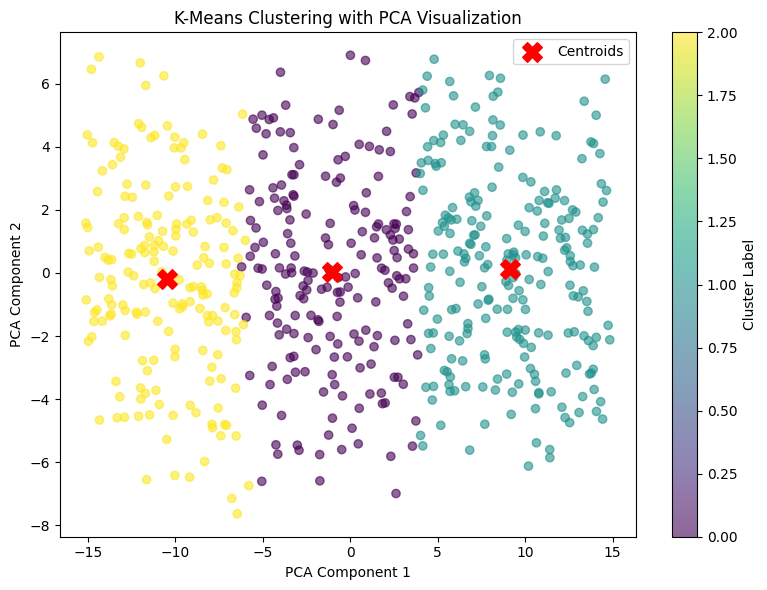

In [ ]:
#5,6) 5.Use the features vector for clustering, with the X_features or reduced_features. 6.Apply K-Means   --------APPLY K-MEANS WITHOUT SCALER
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Drop the diagnosis column from X_encoded_reduced if it exists
# Assuming diagnosis is in y_train, we don't need to include it for clustering
# So here, we just work with the feature set without the diagnosis label

# Apply KMeans clustering
n_clusters = 3  # You can change this based on your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_encoded_reduced)

# Add the cluster labels to the original data for further analysis
X_encoded_reduced_with_labels = np.hstack([X_encoded_reduced, kmeans_labels.reshape(-1, 1)])

# Display the resulting shape
print("Shape of the clustered dataset with labels:", X_encoded_reduced_with_labels.shape)

# You can also inspect the cluster labels
print("Cluster labels for the first 10 samples:", kmeans_labels[:10])

# Assuming X_encoded_reduced is your feature matrix and kmeans_labels are the cluster labels

# Apply PCA to reduce the dimensions
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_encoded_reduced)
# Create a DataFrame for better organization
clustered_data_Kmeans = pd.DataFrame(X_encoded_reduced, columns=[f"Feature_{i}" for i in range(X_encoded_reduced.shape[1])])
clustered_data_Kmeans['PCA1'] = X_pca[:, 0]  # First principal component
clustered_data_Kmeans['PCA2'] = X_pca[:, 1]  # Second principal component
clustered_data_Kmeans['Cluster'] = kmeans_labels  # Cluster labels

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_encoded_reduced, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_avg}")

# Inspect the DataFrame to track the cluster assignment of each row
print("Clustered data with PCA components and cluster labels:")
print(clustered_data_Kmeans.head())

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot with cluster colors
scatter = plt.scatter(clustered_data_Kmeans['PCA1'], clustered_data_Kmeans['PCA2'],
                       c=clustered_data_Kmeans['Cluster'], cmap='viridis', alpha=0.6, marker='o')

# Add cluster centroids to the plot
centroids = pca_2d.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label="Centroids")

# Add labels, title, and color bar
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA Visualization')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
!pip install KMedoids
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.2/528.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


Silhouette Score for K-Medoids: 0.24270007092921628


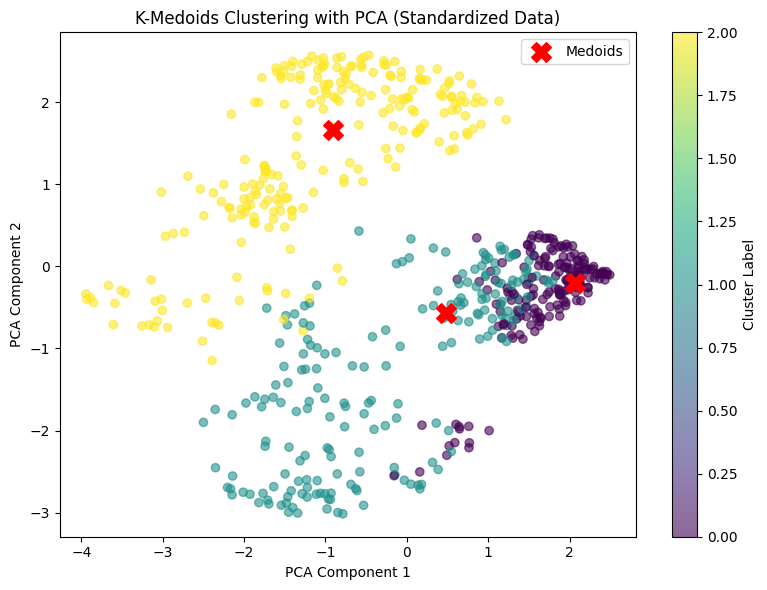

In [ ]:
#Apply K-medoids with scaler
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_reduced)

# Step 2: Apply PCA to reduce the dimensions to 2D for visualization
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

# Step 3: Apply K-Medoids clustering
n_clusters = 3  # Choose your desired number of clusters
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, metric='euclidean')  # You can also try 'manhattan' or other metrics
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmedoids_labels)
print(f"Silhouette Score for K-Medoids: {silhouette_avg}")
#The value of 0.0147 means Clusters are overlap, or points are ambiguous in their cluster assignment.

# Step 4: Create a DataFrame for better organization
clustered_data_KMedoids_Scaler = pd.DataFrame(X_scaled, columns=[f"Feature_{i}" for i in range(X_scaled.shape[1])])
clustered_data_KMedoids_Scaler['PCA1'] = X_pca[:, 0]  # First principal component
clustered_data_KMedoids_Scaler['PCA2'] = X_pca[:, 1]  # Second principal component
clustered_data_KMedoids_Scaler['Cluster'] = kmedoids_labels  # Cluster labels

# Step 5: Visualize the clusters in 2D using PCA components
plt.figure(figsize=(8, 6))

# Scatter plot with cluster colors
scatter = plt.scatter(clustered_data_KMedoids_Scaler['PCA1'], clustered_data_KMedoids_Scaler['PCA2'],
                       c=clustered_data_KMedoids_Scaler['Cluster'], cmap='viridis', alpha=0.6, marker='o')

# Add cluster medoids to the plot
medoid_indices = kmedoids.medoid_indices_
medoid_coordinates = pca_2d.transform(X_scaled[medoid_indices])  # Transform medoids to 2D using PCA
plt.scatter(medoid_coordinates[:, 0], medoid_coordinates[:, 1], s=200, c='red', marker='X', label="Medoids")

# Add labels, title, and color bar
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Medoids Clustering with PCA (Standardized Data)')
plt.legend()
plt.tight_layout()
plt.show()




Silhouette Score for K-Medoids (without scaling): 0.2536485977089394


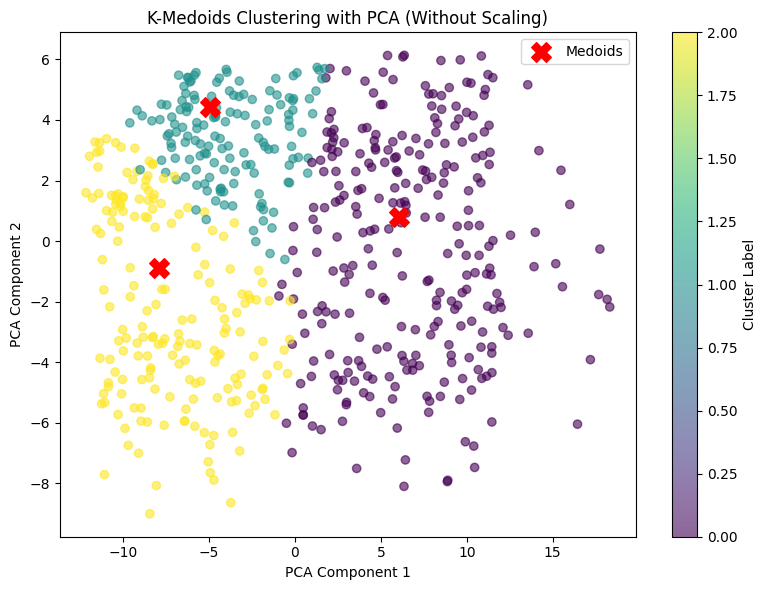

In [ ]:
#Apply KMedoids without scaler
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce the dimensions to 2D for visualization (without scaling)
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_encoded_reduced)

# Step 2: Apply K-Medoids clustering
n_clusters = 3  # Choose your desired number of clusters
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, metric='euclidean')  # You can also try 'manhattan' or other metrics
kmedoids_labels = kmedoids.fit_predict(X_encoded_reduced)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_encoded_reduced, kmedoids_labels)
print(f"Silhouette Score for K-Medoids (without scaling): {silhouette_avg}")
# The silhouette score will help to evaluate the clustering performance.

# Step 3: Create a DataFrame for better organization
clustered_data_KMedoids = pd.DataFrame(X_encoded_reduced, columns=[f"Feature_{i}" for i in range(X_encoded_reduced.shape[1])])
clustered_data_KMedoids['PCA1'] = X_pca[:, 0]  # First principal component
clustered_data_KMedoids['PCA2'] = X_pca[:, 1]  # Second principal component
clustered_data_KMedoids['Cluster'] = kmedoids_labels  # Cluster labels

# Step 4: Visualize the clusters in 2D using PCA components
plt.figure(figsize=(8, 6))

# Scatter plot with cluster colors
scatter = plt.scatter(clustered_data_KMedoids['PCA1'], clustered_data_KMedoids['PCA2'],
                       c=clustered_data_KMedoids['Cluster'], cmap='viridis', alpha=0.6, marker='o')

# Add cluster medoids to the plot
medoid_indices = kmedoids.medoid_indices_
medoid_coordinates = pca_2d.transform(X_encoded_reduced[medoid_indices])  # Transform medoids to 2D using PCA
plt.scatter(medoid_coordinates[:, 0], medoid_coordinates[:, 1], s=200, c='red', marker='X', label="Medoids")

# Add labels, title, and color bar
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Medoids Clustering with PCA (Without Scaling)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Save clustered_data_Kmeans to CSV
#clustered_data_Kmeans.to_csv('clustered_data_Kmeans.csv', index=False)
#print("File 'clustered_data_Kmeans.csv' has been saved!")

# Save clustered_data_Kmeans_Scaler to CSV
clustered_data_Kmeans_Scaler.to_csv('clustered_data_Kmeans_Scaler.csv', index=False)
print("File 'clustered_data_Kmeans_Scaler.csv' has been saved!")

# Save clustered_data_KMedoids to CSV
#clustered_data_KMedoids.to_csv('clustered_data_KMedoids.csv', index=False)
#print("File 'clustered_data_KMedoids.csv' has been saved!")

# Save clustered_data_KMedoids_Scaler to CSV
#clustered_data_KMedoids_Scaler.to_csv('clustered_data_KMedoids_Scaler.csv', index=False)
#print("File 'clustered_data_KMedoids_Scaler.csv' has been saved!")


File 'clustered_data_Kmeans_Scaler.csv' has been saved!


In [ ]:
import pandas as pd

# Load the dataset (replace '/content/clustered_data.csv' with the actual path to your CSV file)
df = pd.read_csv('/content/clustered_data_Kmeans_Scaler.csv')

# Grouping by 'stages' and finding min and max for specified columns
result = df.groupby('Cluster').agg({
    'Feature_0': ['min', 'max'], #MMSE
    'Feature_1': ['min', 'max'], #Functional Assessment
    'Feature_2': ['min', 'max'] #ADL
})

# Renaming columns for clarity
result.columns = ['mmse_min', 'mmse_max', 'function_assessment_min', 'function_assessment_max', 'adl_min', 'adl_max']
result = result.reset_index()

# Display the result
print(result)


   Cluster  mmse_min  mmse_max  function_assessment_min  \
0        0 -1.637549  2.496501                -1.373048   
1        1 -1.652044  2.219539                -1.377808   
2        2 -1.638445  2.185690                -1.361187   

   function_assessment_max   adl_min   adl_max  
0                 2.326437 -1.296783  2.340767  
1                 2.315862 -1.345105  1.692987  
2                 2.327640 -1.346242  2.340311  


In [ ]:
import numpy as np
import pandas as pd

# Standardized data as a DataFrame for transformation
standardized_data = {
    'Cluster': [0, 1, 2],  # Include Cluster column
    'mmse_min': [-1.637549, -1.652044, -1.638445],
    'mmse_max': [2.496501, 2.219539, 2.185690],
    'function_assessment_min': [-1.373048, -1.377808, -1.361187],
    'function_assessment_max': [2.326437, 2.315862, 2.327640],
    'adl_min': [-1.296783, -1.345105, -1.346242],
    'adl_max': [2.340767, 1.692987, 2.340311]
}
scaled_df = pd.DataFrame(standardized_data)

# Assuming these are the columns used for scaling
columns_to_decrypt = ['mmse', 'function_assessment', 'adl']

# Example scaler (replace with your actual scaler)
class MockScaler:
    def __init__(self):
        self.mean_ = [20, 10, 50]  # Mean for mmse, function_assessment, adl
        self.scale_ = [5, 2, 10]  # Scale (std deviation) for mmse, function_assessment, adl
        self.feature_names_in_ = columns_to_decrypt

scaler = MockScaler()

# Extract relevant mean and scale values
mean_values = [scaler.mean_[scaler.feature_names_in_.index(col)] for col in columns_to_decrypt]
scale_values = [scaler.scale_[scaler.feature_names_in_.index(col)] for col in columns_to_decrypt]

# Adjust `scaled_values` to align with the selected columns
scaled_values = scaled_df[['mmse_min', 'mmse_max', 'function_assessment_min', 'function_assessment_max', 'adl_min', 'adl_max']].to_numpy()

# Reshape means and scales to match the columns being decrypted
mean_values = np.tile(mean_values, 2)  # Repeat for min and max
scale_values = np.tile(scale_values, 2)  # Repeat for min and max

# Perform decryption
original_values = (scaled_values * scale_values) + mean_values

# Convert back to DataFrame
decrypted_df = pd.DataFrame(original_values, columns=['mmse_min', 'mmse_max', 'function_assessment_min', 'function_assessment_max', 'adl_min', 'adl_max'])

# Combine decrypted values with the cluster column
final_df = pd.concat([scaled_df[['Cluster']], decrypted_df], axis=1)

print(final_df)


   Cluster   mmse_min   mmse_max  function_assessment_min  \
0        0  11.812255  14.993002                 36.26952   
1        1  11.739780  14.439078                 36.22192   
2        2  11.807775  14.371380                 36.38813   

   function_assessment_max   adl_min   adl_max  
0                31.632185  7.406434  73.40767  
1                31.579310  7.309790  66.92987  
2                31.638200  7.307516  73.40311  


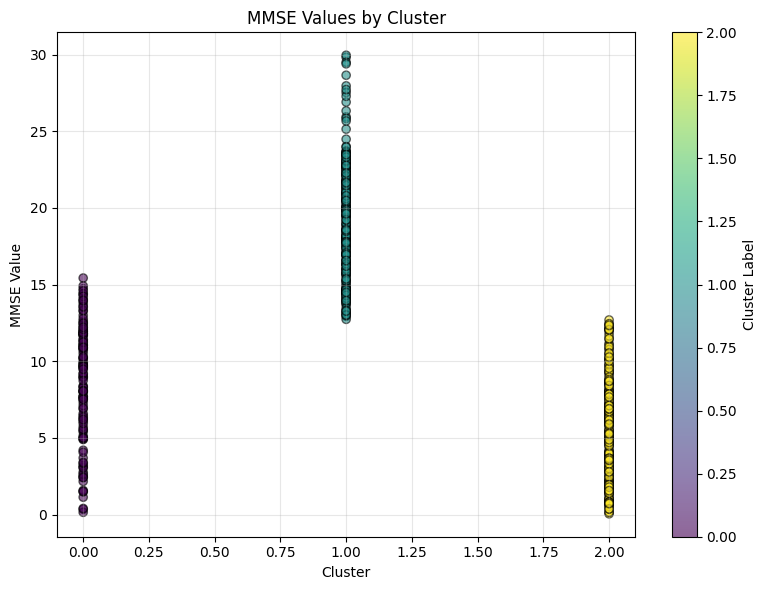

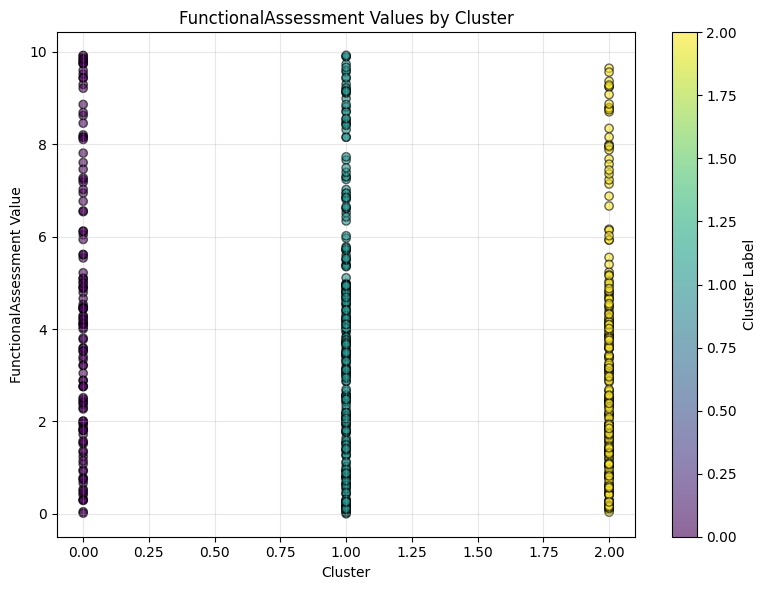

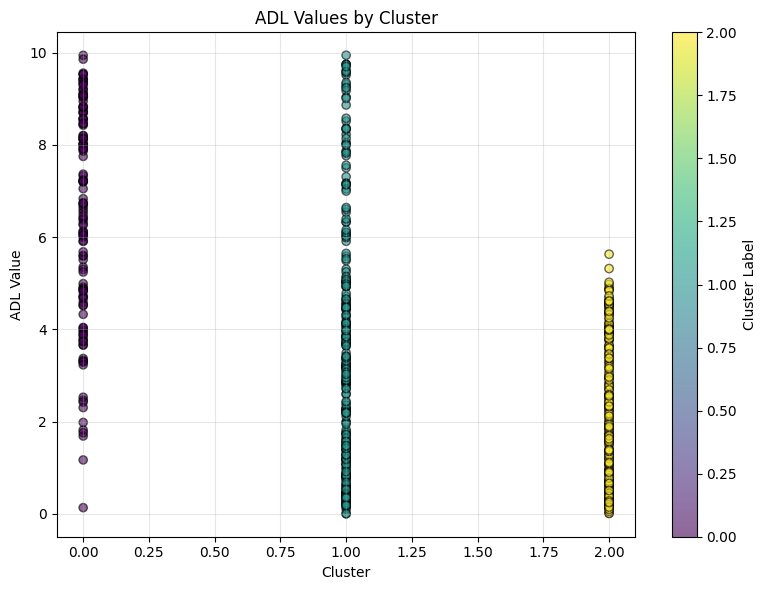

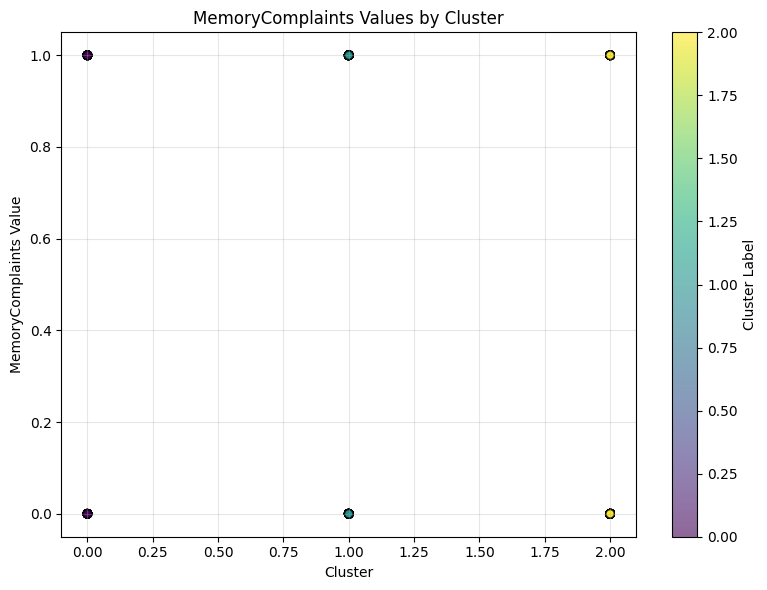

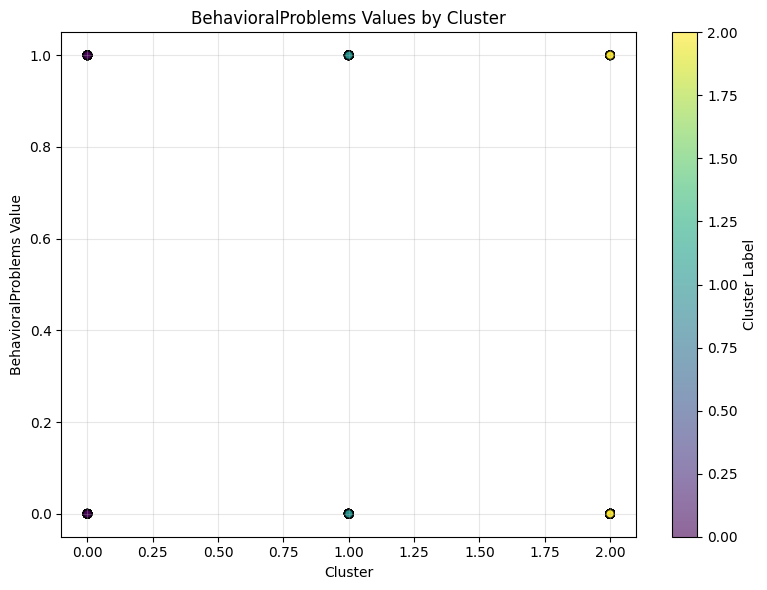

In [ ]:
#Display the relationship between cluster and each top 5 features

#Apply K-Means without Scaler = 0.198, Among these 4 method, the K-Means without Scaler is the most well-separated, and appropriately assigned.
import matplotlib.pyplot as plt

# Mapping original feature names to new names
feature_names = {
    'Feature_0': 'MMSE',
    'Feature_1': 'FunctionalAssessment',
    'Feature_2': 'ADL',
    'Feature_3': 'MemoryComplaints',
    'Feature_4': 'BehavioralProblems'
}

# Generate a separate graph for each feature
for feature, name in feature_names.items():
    if feature in clustered_data_Kmeans.columns:
        plt.figure(figsize=(8, 6))

        # Scatter plot for the feature with actual values
        plt.scatter(clustered_data_Kmeans['Cluster'], clustered_data_Kmeans[feature],
                    c=clustered_data_Kmeans['Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')

        # Add labels and title
        plt.xlabel('Cluster')
        plt.ylabel(f'{name} Value')
        plt.title(f'{name} Values by Cluster')
        plt.colorbar(label='Cluster Label')
        plt.grid(alpha=0.3)
        plt.tight_layout()

        # Show the plot
        plt.show()
    else:
        print(f"Column '{feature}' not found in the data. Please check the column names.")
# Focus on MMSE graph only,
#cluster 0 = low MMSE
#cluster 1 = high MMSE
#cluster 2 = medium MMSE

In [ ]:
print(clustered_data_Kmeans.columns)  # For K-Means without Scaler

NameError: name 'clustered_data_Kmeans' is not defined

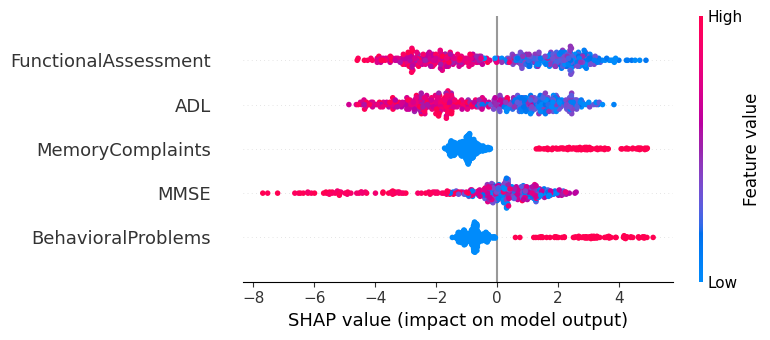

In [ ]:
#b. Add SHAP Explanations for XGBoost:  ---Explainable AI (XAI)
import shap

# Initialize SHAP explainer with the XGBoost model
explainer = shap.Explainer(model)

# Explain the model’s prediction for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary of feature importance
shap.summary_plot(shap_values, X_test)

# Plot SHAP values for a specific instance (e.g., the first sample in the test set)
shap.initjs()
# Corrected code for the force plot
shap.plots.force(explainer.expected_value, shap_values[0], X_test.iloc[0])


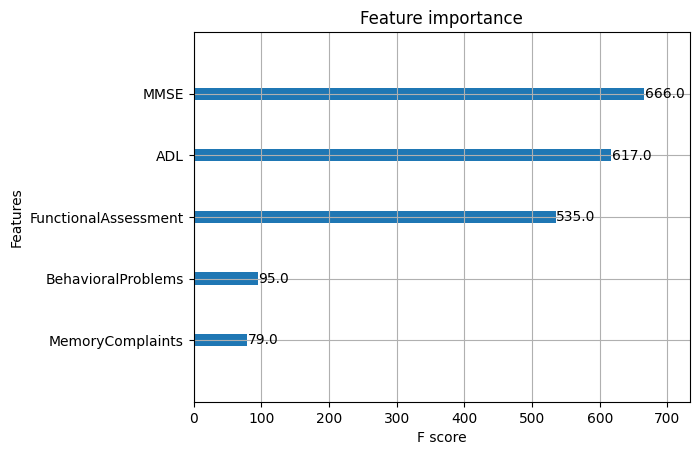

In [ ]:
#Visualizing Feature Importance (Traditional XGBoost Feature Importance)
import xgboost as xgb

# Plot the feature importance using XGBoost
xgb.plot_importance(model, importance_type='weight')  # You can choose 'weight', 'gain', or 'cover'
plt.show()


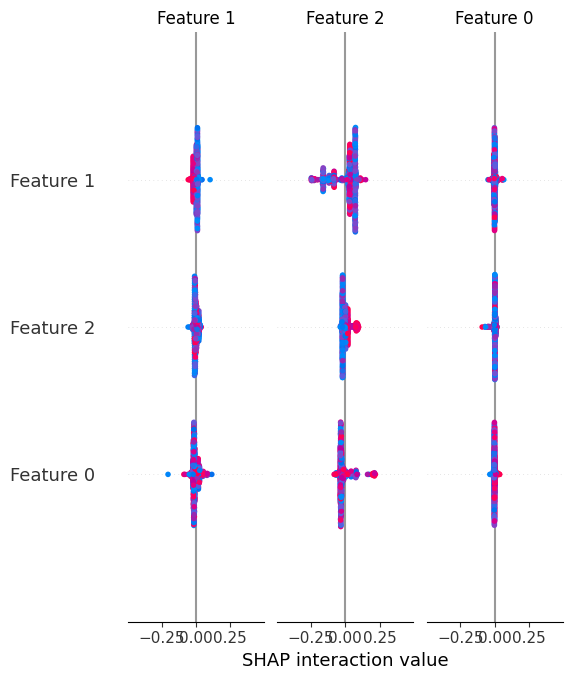

In [ ]:
#If you want to apply SHAP for clustering, you can treat clustering as a supervised learning problem by using the cluster labels as the target variable and explaining the model’s predictions.
#However, clustering is unsupervised, so the explanation might be indirect.

# Train a classifier to predict cluster labels (e.g., RandomForest or XGBoost)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded_reduced, kmeans_labels)

# Use SHAP to explain the RandomForest classifier's decision for clusters
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_encoded_reduced)

# Plot the summary of SHAP values
shap.summary_plot(shap_values, X_encoded_reduced)


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1bdb45dbe714cecbd591399cb13e8423ae20b6b336db36e26951e9c86f80f8a6
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


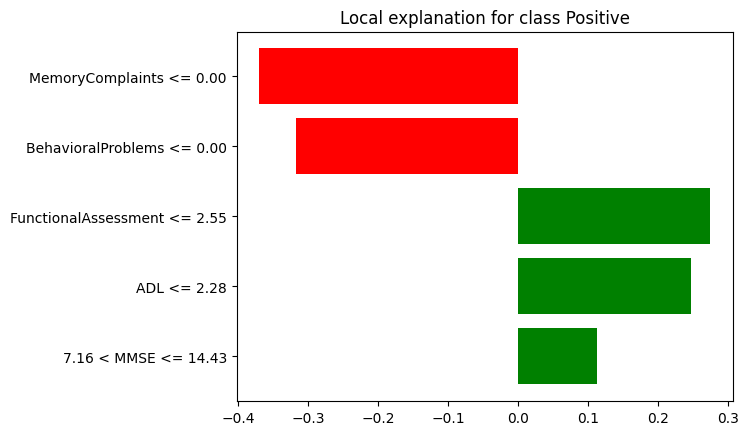

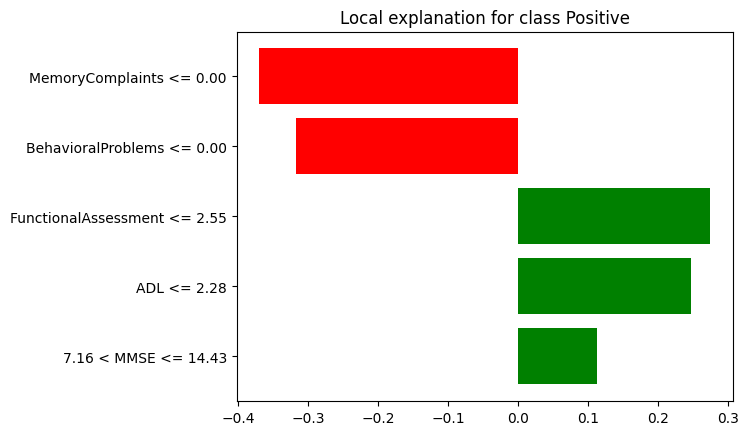

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume your X_train, y_train, X_test, and y_test are already defined and processed



# Train the XGBoost model (if not already trained)
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Define the LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Training data as numpy array
    feature_names=X_train.columns,  # Feature names from the dataframe
    class_names=['Negative', 'Positive'],  # Binary class names (modify as needed)
    mode='classification',  # Change to 'regression' if it's a regression model
    discretize_continuous=True  # This helps with continuous data
)

# Explain a single instance (e.g., the first instance in the test set)
exp = explainer.explain_instance(X_test.iloc[0].values, model.predict_proba)

# Show the explanation
#exp.show_in_notebook()

# Alternatively, plot the explanation
exp.as_pyplot_figure()


In [ ]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:08:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of the classifier: 0.9945


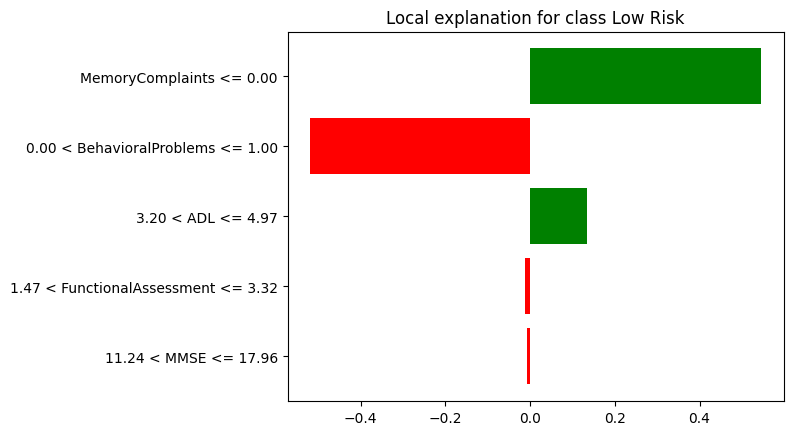

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

selected_feature_names = ['MMSE', 'FunctionalAssessment', 'ADL', 'MemoryComplaints', 'BehavioralProblems']

# Map the clusters to risk levels
cluster_risk_mapping = {
    0: 'High Risk',
    1: 'Low Risk',
    2: 'Moderate Risk'
}

# Example setup
X_train, X_test, y_train, y_test = train_test_split(X_encoded_reduced, kmeans_labels, test_size=0.3, random_state=42)

# Select features 0 to 4 for training
X_train_selected = X_train[:, 0:5]  # Features 0 to 4
X_test_selected = X_test[:, 0:5]    # Features 0 to 4

# Train a supervised classifier to predict the cluster labels (only on selected features)
classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
classifier.fit(X_train_selected, y_train)

# Predict on test data
y_pred = classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the classifier: {accuracy:.4f}")

# Define the LIME Explainer for the classifier using only features 0 to 4
explainer = LimeTabularExplainer(
    training_data=X_train_selected,  # Use only the selected features
    mode='classification',  # LIME works in classification mode, treating clustering as pseudo-classification
    class_names=[cluster_risk_mapping[i] for i in range(3)],  # Use descriptive cluster names
    feature_names=selected_feature_names,  # Only the first 5 feature names
    discretize_continuous=True  # Discretize continuous features
)

# Pick an instance to explain (e.g., the first instance in the test set)
instance_to_explain = X_test_selected[3]  # This instance number can be set

# Use the classifier to predict the cluster label (treating it as a classification task)
exp = explainer.explain_instance(instance_to_explain, classifier.predict_proba)

# Show the explanation in the notebook
exp.show_in_notebook()

# Alternatively, you can plot the explanation as a figure
exp.as_pyplot_figure()
plt.show()

#Cluster 0 = high risk
#Cluster 1 = Low risk
#Cluster 2 = Moderate risk


In [ ]:
import joblib

# Assuming 'kmeans' is your fitted KMeans model
joblib.dump(kmeans, 'alzheimers_model.pkl')


['alzheimers_model.pkl']